Розмір таблиці: (8704, 25)
Типи стовпців: N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                   float64
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                   

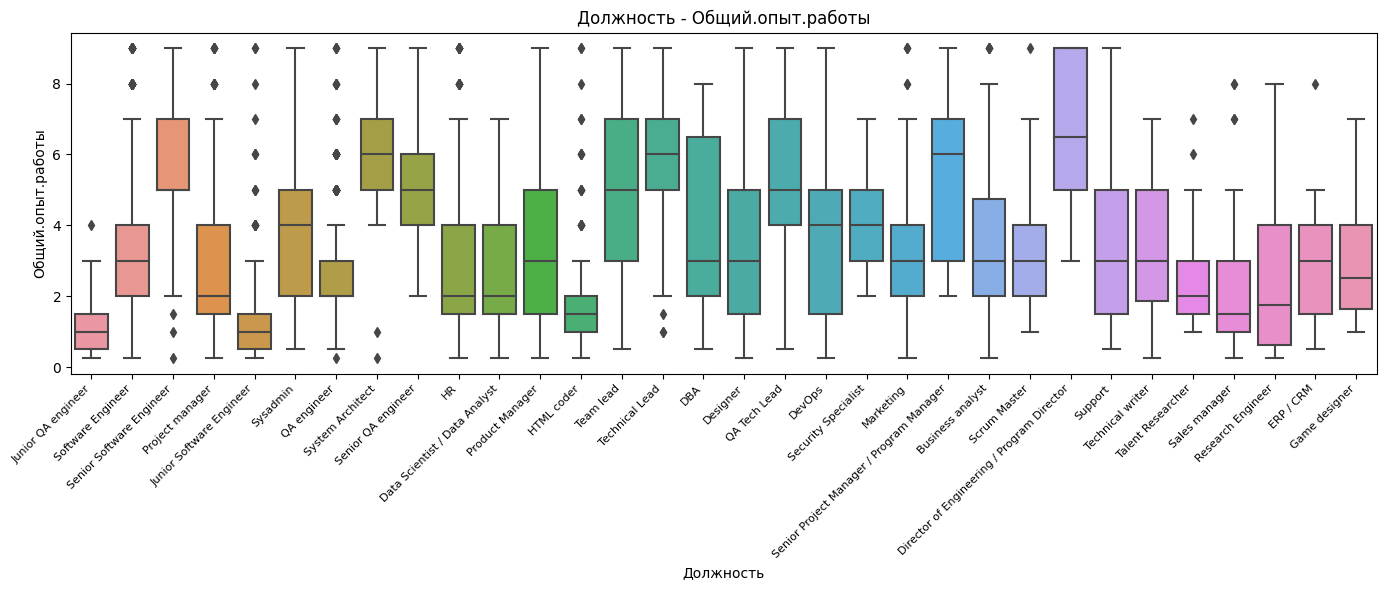

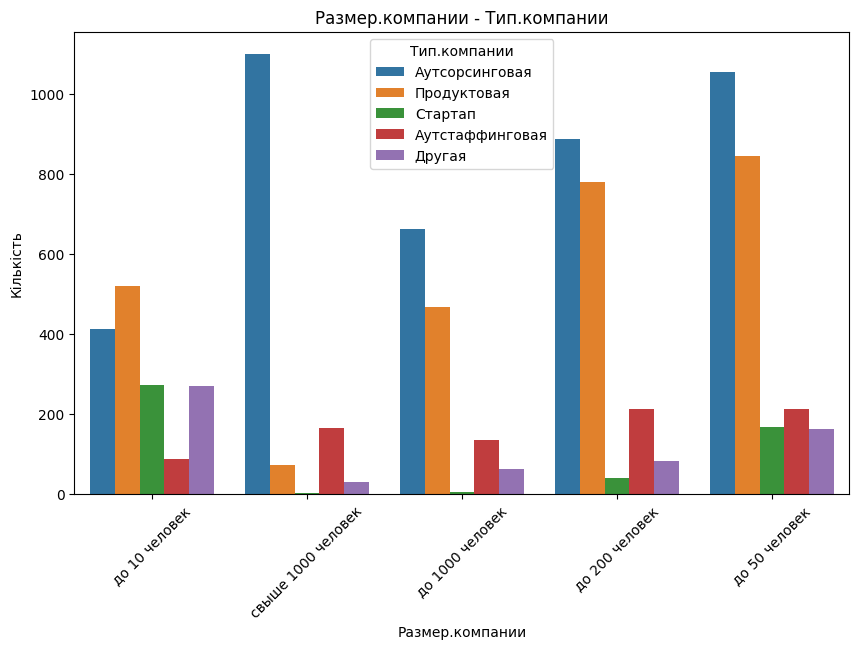

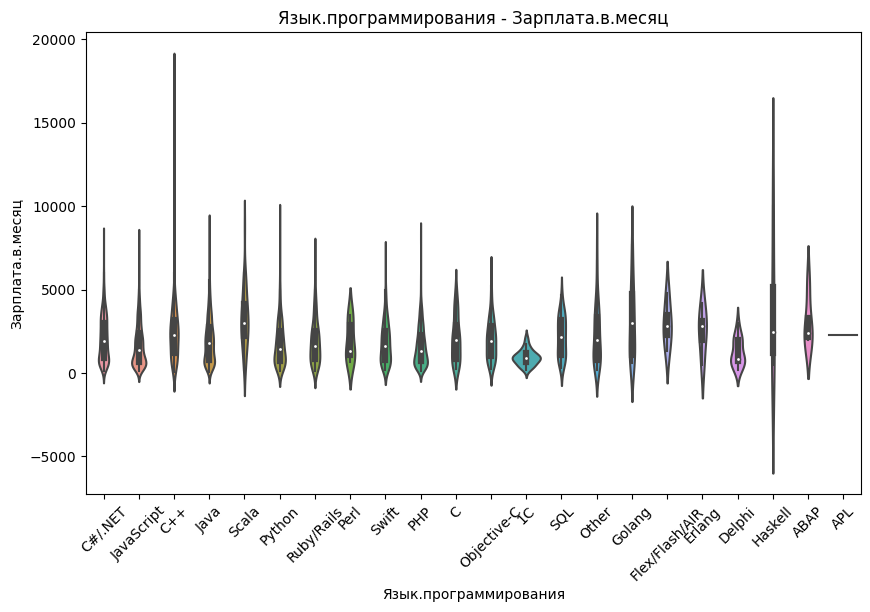

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV file
file_path = r'C:\Users\Сергій\Documents\Code\Current_task\Math-test\2017_jun_final.csv'
data = pd.read_csv(file_path)

# Convert 'Общий.опыт.работы' column to numeric
data['Общий.опыт.работы'] = pd.to_numeric(data['Общий.опыт.работы'], errors='coerce')

# Display the first few rows
data.head()

# Shape of the DataFrame
print("Розмір таблиці:", data.shape)

# Data types of columns
print("Типи стовпців:", data.dtypes)

# Missing values percentage for each column
missing_percent = (data.isnull().sum() / len(data)) * 100
print("Частка пропусків у стовпцях:")
print(missing_percent)

# Drop columns with missing values except for 'Язык.программирования'
data_cleaned = data.dropna(subset=['Язык.программирования'])

# Calculate missing values percentage after dropping columns
missing_percent_cleaned = (data_cleaned.isnull().sum() / len(data_cleaned)) * 100
print("Частка пропусків після видалення стовпців:")
print(missing_percent_cleaned)

# Drop rows with missing values
data_no_na = data.dropna()

# Filtering rows where 'Язык.программирования' is 'Python'
python_data = data[data['Язык.программирования'] == 'Python']

# Grouping data by 'Должность'
grouped = data.groupby('Должность')

# Aggregating data for 'Зарплата.в.месяц'
aggregated_data = grouped['Зарплата.в.месяц'].agg(['min', 'max'])

# Function to fill average salary
def fill_avg_salary(series):
    return series.fillna(series.mean())

# Adding a new column 'avg' with average salary
data['avg'] = data.groupby('Должность')['Зарплата.в.месяц'].transform(fill_avg_salary)

# Display descriptive statistics for the new column 'avg'
print("Описова статистика для нового стовпця 'avg':")
print(data['avg'].describe())

# Saving the data to a CSV file
output_file_path = 'output.csv'
data.to_csv(output_file_path, index=False)

# Plotting the first graph: Должность - Общий.опыт.работы
plt.figure(figsize=(14, 6))  # Increase the figure width for more space
ax = sns.boxplot(x='Должность', y='Общий.опыт.работы', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Adjust x-axis labels
plt.title('Должность - Общий.опыт.работы')
plt.xlabel('Должность')
plt.ylabel('Общий.опыт.работы')
plt.tight_layout()  # Ensures labels and ticks are visible
plt.show()

# Plotting the second graph: Размер.компании - Тип.компании
plt.figure(figsize=(10, 6))
sns.countplot(x='Размер.компании', hue='Тип.компании', data=data)
plt.xticks(rotation=45)
plt.title('Размер.компании - Тип.компании')
plt.xlabel('Размер.компании')
plt.ylabel('Кількість')
plt.legend(title='Тип.компании')
plt.show()

# Plotting the third graph: Язык.программирования - Зарплата.в.месяц
plt.figure(figsize=(10, 6))
sns.violinplot(x='Язык.программирования', y='Зарплата.в.месяц', data=data)
plt.xticks(rotation=45)
plt.title('Язык.программирования - Зарплата.в.месяц')
plt.xlabel('Язык.программирования')
plt.ylabel('Зарплата.в.месяц')
plt.show()